In [229]:
#Importing the required modules
import numpy as np
from scipy.stats import mode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [230]:
#importing the dataset
df= pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [231]:
#positioning the target variable price to the last
target_column = df.pop('price')
  
df.insert(9, 'price', target_column)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [232]:
df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth percent", "table": "table percent"},inplace = True)

In [233]:
#viewing the data
df.head()

,carat,cut,color,clarity,depth percent,table percent,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [234]:
#name of columns
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth percent', 'table percent',
       'length', 'width', 'depth', 'price'],
      dtype='object')

In [235]:
#type of data
df.dtypes

carat            float64
cut               object
color             object
clarity           object
depth percent    float64
table percent    float64
length           float64
width            float64
depth            float64
price              int64
dtype: object

In [236]:
#shape of dataset
df.shape

(53940, 10)

In [237]:
# Summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   cut            53940 non-null  object 
 2   color          53940 non-null  object 
 3   clarity        53940 non-null  object 
 4   depth percent  53940 non-null  float64
 5   table percent  53940 non-null  float64
 6   length         53940 non-null  float64
 7   width          53940 non-null  float64
 8   depth          53940 non-null  float64
 9   price          53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [238]:
df.head()

,carat,cut,color,clarity,depth percent,table percent,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [239]:
#positioning the target variable price to the last
targe_column = df.pop('price')
  
df.insert(9, 'price', targe_column)
df

,carat,cut,color,clarity,depth percent,table percent,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [240]:
print(df['cut'].unique().tolist())
print(df['clarity'].unique().tolist())
print(df['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [241]:
df.shape

(53940, 10)

In [242]:
# Statistical details of the dataframe 

df.describe()

,carat,depth percent,table percent,length,width,depth,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [243]:
# Numerical Columns

num_data = df.select_dtypes(['int64','float64'])

num_cols = num_data.columns

print('Numerical Columns : {}'.format(list(num_cols)))

Numerical Columns : ['carat', 'depth percent', 'table percent', 'length', 'width', 'depth', 'price']


In [244]:
# Categorical Columns

cat_data = df.select_dtypes(['object'])

cat_cols = cat_data.columns

print('categorical Columns : {}'.format(list(cat_cols)))

categorical Columns : ['cut', 'color', 'clarity']


# Missing Value Treatment

In [245]:
# Now we can see the null values 
df.isnull().any()

carat            False
cut              False
color            False
clarity          False
depth percent    False
table percent    False
length           False
width            False
depth            False
price            False
dtype: bool

In [246]:
df.isnull().sum()

carat            0
cut              0
color            0
clarity          0
depth percent    0
table percent    0
length           0
width            0
depth            0
price            0
dtype: int64

In [247]:
df = df.dropna()

In [248]:
df.isnull().sum()

carat            0
cut              0
color            0
clarity          0
depth percent    0
table percent    0
length           0
width            0
depth            0
price            0
dtype: int64

In [249]:
numeric_data = df.select_dtypes(['int64','float64']).columns
numeric_data

Index(['carat', 'depth percent', 'table percent', 'length', 'width', 'depth',
       'price'],
      dtype='object')

In [250]:
df.loc[(df['length'] == 0) | (df['width'] == 0) | (df['depth'] == 0) ]

,carat,cut,color,clarity,depth percent,table percent,length,width,depth,price
2207,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,3142
2314,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
4791,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
5471,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,3837
10167,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,4731
11182,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,4954
11963,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0,5139
13601,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,5564
15951,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
24394,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631


<AxesSubplot:xlabel='color', ylabel='price'>

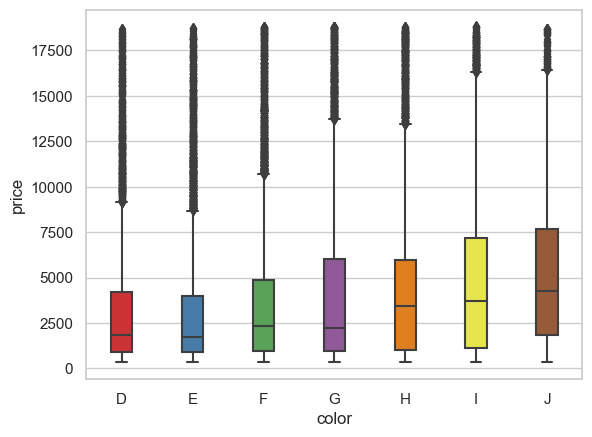

In [251]:
sns.boxplot(y='price',data=df,x='color',palette ='Set1',width =0.3,order = ['D','E','F','G','H','I','J'] )

From the above plot, we can see that G, H, I and J type color has less number of outliers compared to D and E

<AxesSubplot:xlabel='cut', ylabel='price'>

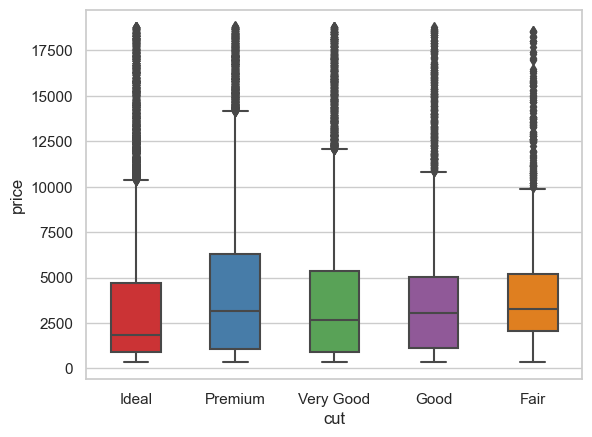

In [252]:
sns.boxplot(y='price',data=df,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )

From the above plot, we can see that the lower the quality of cut, the higher the number of outliers except for the Ideal cut type.

<AxesSubplot:xlabel='clarity', ylabel='price'>

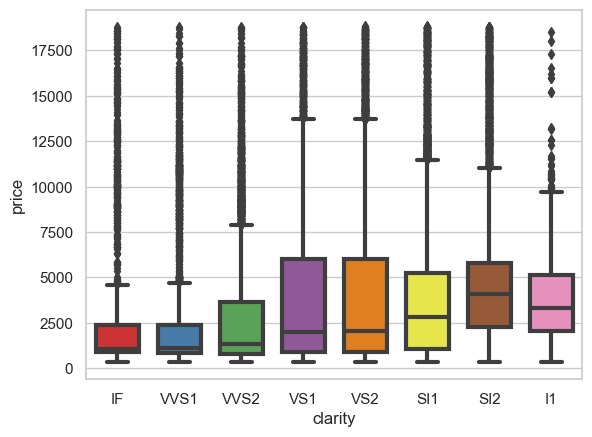

In [253]:
sns.boxplot(y='price',data=df,x='clarity',palette ='Set1', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])


we can see that IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color. Moreover VS1,VS2 are having less number of outliers compared to others.

<AxesSubplot:xlabel='clarity'>

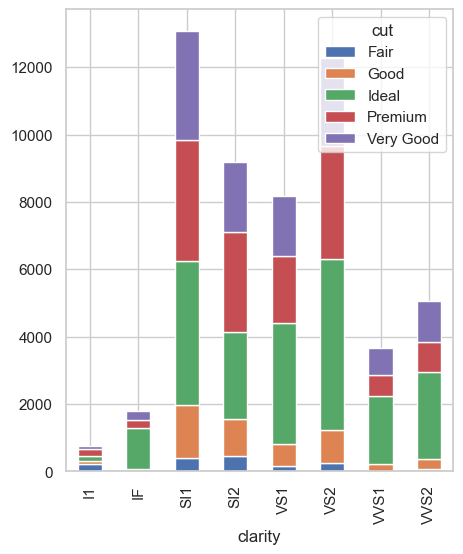

In [254]:
clarity_cut_table = pd.crosstab(index=df["clarity"], columns=df["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(5,6),
                 stacked=True)

We can see that from above that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1.In that, the cut they prefer is Ideal, Premium, and very good's diamond cut category. Moreover, we can infer that people are not taking the highest clarity diamonds, such as IF or VVS1 and others . and are ready to sacrifice on clarity but are more focusing on the cut of the diamonds.

<AxesSubplot:xlabel='cut'>

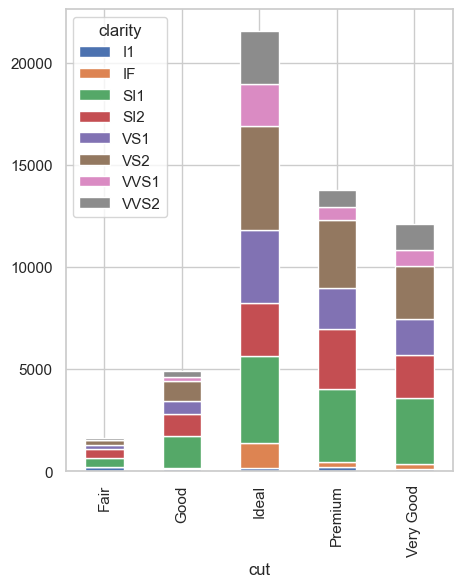

In [255]:
cut_clarity_table = pd.crosstab(index=df["cut"], columns=df["clarity"])

cut_clarity_table.plot(kind="bar", 
                 figsize=(5,6),
                 stacked=True)

We can see that people prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity.

<AxesSubplot:xlabel='color'>

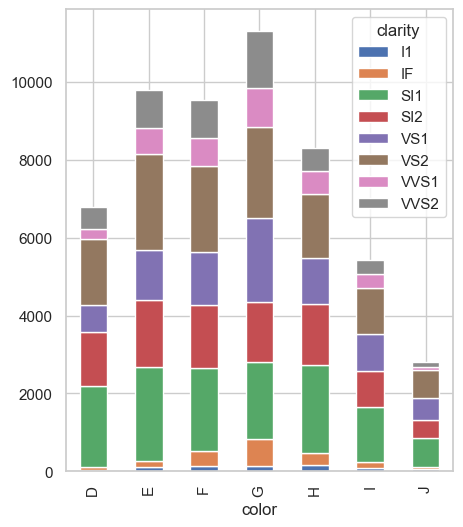

In [256]:
color_clarity_table = pd.crosstab(index=df["color"], columns=df["clarity"])

color_clarity_table.plot(kind="bar", 
                 figsize=(5,6),
                 stacked=True)

We can see that from above that most of the people prefer G color followed by E, F, and H.In that the clarity they mostly prefer SI1 or SI2 category.


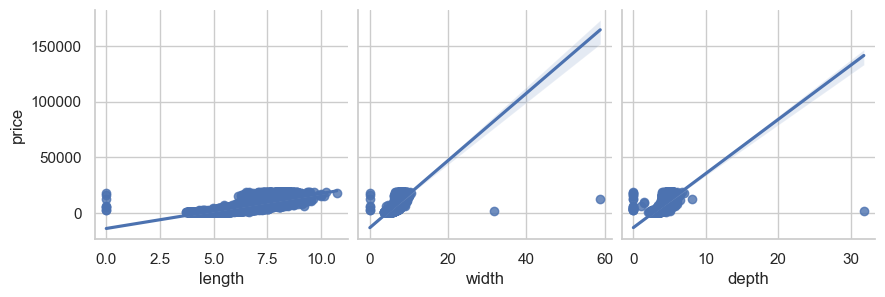

In [257]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['length','width','depth'] , y_vars =  ['price'] , kind = 'reg')

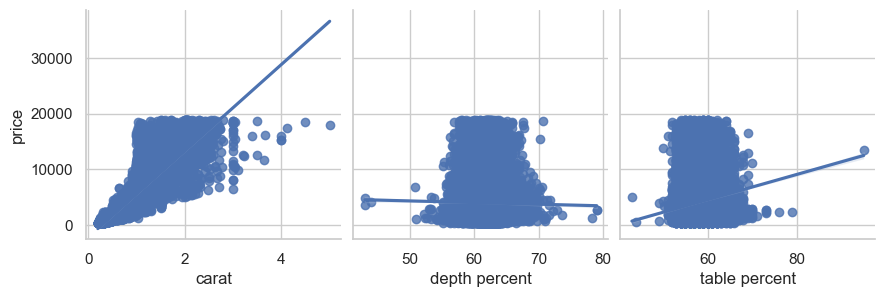

In [258]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['carat','depth percent', 'table percent'] , y_vars =  ['price'] , kind = 'reg')

We could see that carat, length, width, and depth are showing linearity with price with fewer outliers and table %, depth %, and L/W are showing linearity but with high outliers.



# Label Encoding

In [259]:
df['cut'].unique()
print(np.unique(df[['cut', 'color','clarity']].values))
le= LabelEncoder()
df['cut']=le.fit_transform(df['cut'])
df['color']=le.fit_transform(df['color'])
df['clarity']=le.fit_transform(df['clarity'])

['D' 'E' 'F' 'Fair' 'G' 'Good' 'H' 'I' 'I1' 'IF' 'Ideal' 'J' 'Premium'
 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2' 'Very Good']


In [260]:
df.head()

,carat,cut,color,clarity,depth percent,table percent,length,width,depth,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335


In [261]:
# Splitting the columns

X = df.iloc[:,:-1]

y = df.iloc[:,-1]
X


,carat,cut,color,clarity,depth percent,table percent,length,width,depth
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [262]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

First of all, you don’t need to normalise your inputs until one/more of the inputs start to dominate others - which is the fundamental reason behind normalization/standardization.

Generally machine learning tasks are divided into two major groups - regression and classification. For regression, you can normalise the outputs like you do for inputs but that won’t change anything because error is normalised in the same way. However, for neural networks scaling is necessary because the range of the activations functions has some definite value (for example: range of Sigmoid is [0, 1]. From my experience, for a regression using LSTM-RNN, you need to de-normalize outputs once again in the final layer.

For classification, normalizing the outputs isn’t necessary. However, I haven’t checked the consequences of doing so but that seems meaningless, specially if you use one-hot encoding.

# Normalizing the data

In [263]:
scaler = MinMaxScaler()
num_features=['carat','cut','color','clarity','depth percent','table percent','length','width','depth']
normalize_data = scaler.fit_transform(X.loc[:,num_features])
print(normalize_data.shape,type(normalize_data))

(53940, 9) <class 'numpy.ndarray'>


In [264]:
normalize_data

array([[0.00623701, 0.5       , 0.16666667, ..., 0.36778399, 0.06757216,
        0.07641509],
       [0.002079  , 0.75      , 0.16666667, ..., 0.36219739, 0.06519525,
        0.07264151],
       [0.00623701, 0.25      , 0.16666667, ..., 0.37709497, 0.06910017,
        0.07264151],
       ...,
       [0.1039501 , 1.        , 0.        , ..., 0.52700186, 0.09643463,
        0.11194969],
       [0.13721414, 0.75      , 0.66666667, ..., 0.5726257 , 0.10390492,
        0.11761006],
       [0.11434511, 0.5       , 0.        , ..., 0.54283054, 0.09966044,
        0.11446541]])

# Train and test split

In [265]:
X_train, X_test, y_train, y_test = train_test_split(normalize_data, y, train_size = 0.75, random_state = 0)

In [266]:
type(X_train)

numpy.ndarray

In [267]:
y_train=np.array(y_train)
type(y_train)

numpy.ndarray

# KNN SCRATCH

In [268]:
distance=np.zeros(y_test.shape)
y_test_pred=np.zeros(y_test.shape)
k=3
for i in range(len(X_test)):
    distance=np.sqrt(((X_test[i]-X_train)**2).sum(axis=1))
    sort_value=(np.argsort(distance))
    sort_value=sort_value[:k]
    y_test_pred[i]=y_train[sort_value].mean()
print(y_test_pred)

[4681.         6800.         5486.33333333 ... 3435.66666667 2958.
 1645.66666667]


In [269]:
y_test_pred.shape

(13485,)

In [270]:
y_test.shape

(13485,)

In [271]:
#Comparision dataframe
comp_df = pd.DataFrame(list(zip(y_test, y_test_pred)),
               columns =['Y_test', 'Y_test_pred'])
comp_df

,Y_test,Y_test_pred
0,4733,4681.000000
1,6424,6800.000000
2,5510,5486.333333
3,8770,11926.666667
4,4493,4825.666667
...,...,...
13480,2494,2168.333333
13481,4861,3771.333333
13482,2932,3435.666667
13483,3422,2958.000000


Evaluation of scratch

In [272]:
from sklearn import metrics
knn_scratch_acu=metrics.r2_score(y_test,y_test_pred)

# Using Scikit Learn Library

In [273]:
#Importing KNN regressor class from neighbours module
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)  #fit the model


KNeighborsRegressor(n_neighbors=3)

In [274]:
pred=model.predict(X_test) #make prediction on test set
skl_acu=metrics.r2_score(y_test,pred)

In [275]:
print("Accuracy calculated using knn scratch:",knn_scratch_acu)
print("Accuracy calculated using Scikitlearn:",skl_acu)

Accuracy calculated using knn scratch: 0.9666750431189519
Accuracy calculated using Scikitlearn: 0.9666724322567254


# Conclusion


from this we came to know that we get the same accuracy 